In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.coordinates import search_around_sky, SkyCoord
from astropy import units as u
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 999)

In [5]:
# dr7_train = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/TRAIN.csv')
# dr7_test = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/TEST.csv')

matched_dr14 = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/dr14/matched_dr14.csv')

In [9]:
clean = matched_dr14[matched_dr14['ERR']<.4]
clean2 = matched_dr14[matched_dr14['ERR']<.3]
print(matched_dr14.shape, clean.shape, clean2.shape)

(28055, 22) (23003, 22) (20341, 22)


In [12]:
print(dr7_train.shape)
print(dr7_test.shape)
print(matched_dr14.shape)

(7662, 23)
(1375, 23)
(23003, 23)


In [13]:
frames = [dr7_train,dr7_test]
combined_dr7 = pd.concat(frames)
combined_dr7.shape

(9037, 23)

In [14]:
print(matched_dr14.columns)
print(combined_dr7.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'MJD', 'ra', 'dec', 'Mass', 'z',
       'ERR', 'M_i', 'spec_mjd', 'ra.1', 'dec.1', 'u_band', 'g_band', 'r_band',
       'i_band', 'z_band', 'ug', 'gr', 'ri', 'iz', 'zu'],
      dtype='object')
Index(['ID', 'Mass_ground_truth', 'RA', 'DEC', 'tau_lim_lo', 'tau_lim_hi',
       'sig_lim_lo', 'sig_lim_hi', 'mu', 'u_band', 'g_band', 'r_band',
       'i_band', 'z_band', 'z', 'M_i', 'ug', 'gr', 'ri', 'iz', 'zu', 'tau',
       'sigma'],
      dtype='object')


In [15]:
dr7_train.shape[0] + dr7_test.shape[0] == combined_dr7.shape[0]

True

In [16]:
# Match data attributes in the 2 data sets using astropy's SkyCoord
COORD1 = SkyCoord(matched_dr14['ra'], matched_dr14['dec'], frame='icrs', unit='deg')
COORD2 = SkyCoord(combined_dr7['RA'], combined_dr7['DEC'], frame='icrs', unit='deg')
IDX1, IDX2, OTHER1, OTHER2 = search_around_sky(COORD1, COORD2, seplimit=0.5 * u.arcsec)

# Generating columns for the matched
X_TRAIN = []
for i in range(len(IDX1)):
    result = matched_dr14.iloc[IDX1[i]].append(combined_dr7.iloc[IDX2[i]])
    X_TRAIN.append(result)
X_TRAIN = pd.concat(X_TRAIN, axis=1)
X_TRAIN = X_TRAIN.T

X_TRAIN = X_TRAIN.loc[:, ~X_TRAIN.columns.str.contains('^Unnamed')]

In [17]:
X_TRAIN.columns
mass_compare = X_TRAIN[['Mass', 'Mass_ground_truth', 'ERR']]
mass_compare = mass_compare[mass_compare['ERR'] < 1]
mass_compare.shape

(7999, 3)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Virial Mass Comparison DR7 & DR14 (~8k AGN)')

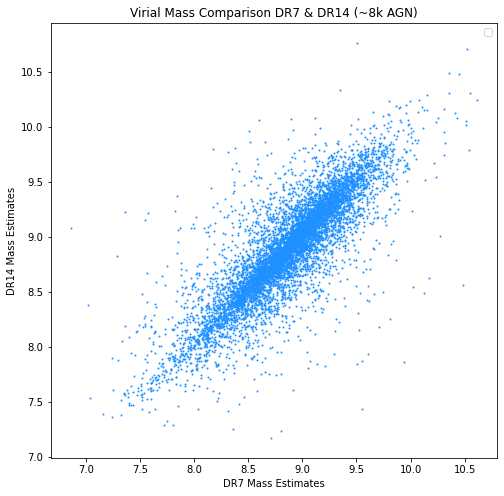

In [19]:
plt.figure(figsize=[8,8])
plt.scatter(mass_compare['Mass'], mass_compare['Mass_ground_truth'], s=1, color='dodgerblue')
# plt.plot(mass_compare['z'], mass_compare['z'], color='black', label ='1:1 line')
plt.xlabel('DR7 Mass Estimates')
plt.ylabel('DR14 Mass Estimates')
plt.legend()
plt.title('Virial Mass Comparison DR7 & DR14 (~8k AGN)')